In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Thư Viện


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Đọc dữ liệu

In [3]:
import os

In [4]:
cd /content/drive/MyDrive/chuyen de

/content/drive/MyDrive/chuyen de


In [5]:
ls

KLTN/


In [6]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/CDTN K2 Chủ đề 9/KLTN.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/chuyen de')

# Hiển thị danh sách các tệp sau khi giải nén


In [7]:
print("Các tệp sau khi giải nén:")
print(os.listdir('/content/drive/MyDrive/chuyen de/KLTN'))

Các tệp sau khi giải nén:
['00076c43f2f88b4d6d0d23c90e5f1222.csv', '0009f4c96d9d1f43afe25cc886ac38eb.csv', '001d588dbe414b2861f9e09edef9af82.csv', '001d8ed136f9101888d0f8b657b84f59.csv', '00254f98173849241a163fcbe4df71b0.csv', '002dfc658c475172ad26662aef8efa86.csv', '008d486b7429a9a722ca7870195be93d.csv', '008f71483265a418e43f62d3de213cd4.csv', '009d6e4f13611fea4e04fdbaf433fc64.csv', '00a2c3499baf2b5b8b9dab557f1fbe0f.csv', '00bcbc76fa56c2abc7a11515f847372c.csv', '00e1e302c25b59c8a115317144179f5f.csv', '00ffe4acea522dedf1781200f6677538.csv', '0117e813bfd19b03b8daba518d53a41a.csv', '011ebda52fc3b3156c394fe67ffd252e.csv', '01342e955aa06955a43def43e79e7c10.csv', '013aeeb51a1d39ae23e00ab143b45cd5.csv', '013c4e0cbe0dfe4d406d7d54560c7c5a.csv', '01db9fa5fdf5c67b268026adfc33bdb8.csv', '01dc46632009cf263006f12c7057ef3c.csv', '01dcd1f4877b59e791c4c291eacc9853.csv', '01edba417acb0c29c62d76d05b219224.csv', '01ff1becd6a52d2ab5544571fd0af045.csv', '0210c8dbef0ce008d1f17bef762d19ad.csv', '024ae794fef5

In [8]:
len(os.listdir('/content/drive/MyDrive/chuyen de/KLTN'))

2900

In [9]:
data = os.listdir('/content/drive/MyDrive/chuyen de/KLTN')

In [10]:
cd KLTN

/content/drive/MyDrive/chuyen de/KLTN


In [11]:
df= pd.read_csv(data[1])

In [12]:
df.columns

Index(['Mã HP', 'Tên HP', 'Điểm', 'Số TC'], dtype='object')

In [13]:
df_new = df.pivot_table(values='Điểm', columns= ['Tên HP','Số TC'])

In [14]:
df_new = df_new.reset_index(drop=True)

In [15]:
df_new.columns.get_level_values('Số TC')

Index([2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 3, 0, 3, 3, 3, 2, 3,
       4, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3],
      dtype='int64', name='Số TC')

In [16]:
def calculate_gpa(df_new):
    tong_diem = 0
    tong_tin = 0
    mon_chua_qua = []

    mon_ = df_new.columns.get_level_values('Tên HP')
    tin_ = df_new.columns.get_level_values('Số TC')

    for i in range(len(tin_)):
        diem = df_new.iloc[0]
        if diem[i] > 4.0:
            tong_diem += diem[i] * tin_[i]
            tong_tin += tin_[i]
        else:
            mon_chua_qua.append([mon_[i], tin_[i]])

    print('Tổng tín đã học qua : ', tong_tin)
    for v in mon_chua_qua:
        print('Môn chưa qua :', v[0], ', TC :', v[1])
    if tong_tin <= 0:
        return 0
    gpa = tong_diem / tong_tin
    return gpa

In [17]:
# Đường dẫn đến thư mục chứa các tệp
dir_path = '/content/drive/MyDrive/chuyen de/KLTN'

In [18]:
# Liệt kê các tệp trong thư mục
data = [os.path.join(dir_path, file) for file in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, file))]

In [19]:
df_new['GPA'] = calculate_gpa(df_new)

Tổng tín đã học qua :  53
Môn chưa qua : Chủ nghĩa xã hội khoa học , TC : 2
Môn chưa qua : GDQP: Công tác quốc phòng - an ninh , TC : 1
Môn chưa qua : GDQP: Đường lối quân sự của Đảng , TC : 1
Môn chưa qua : GDTC: Bóng bàn cơ bản , TC : 1
Môn chưa qua : GDTC: Bóng rổ cơ bản , TC : 1
Môn chưa qua : GDTC: Thể dục cơ bản , TC : 1
Môn chưa qua : GDTC: Thể dục cổ truyền cơ bản , TC : 1
Môn chưa qua : Giải tích 1 , TC : 3
Môn chưa qua : Kinh tế chính trị Mác - Lênin , TC : 2
Môn chưa qua : Logic, suy luận toán học và kỹ thuật đếm , TC : 3
Môn chưa qua : Lập trình Java , TC : 3
Môn chưa qua : Lập trình hướng đối tượng , TC : 3
Môn chưa qua : Ngôn ngữ lập trình , TC : 3
Môn chưa qua : Nâng cao chất lượng giọng hát , TC : 3
Môn chưa qua : Phương pháp luận nghiên cứu khoa học , TC : 3
Môn chưa qua : Số và cấu trúc đại số , TC : 2
Môn chưa qua : Số và cấu trúc đại số , TC : 3
Môn chưa qua : Tiếng Anh sơ trung cấp 3 , TC : 2
Môn chưa qua : Tiếng Nhật 2 , TC : 2
Môn chưa qua : Triết học Mác - Lênin

In [20]:
df_new

Tên HP,Chủ nghĩa xã hội khoa học,Dinh dưỡng và tiết chế,Dẫn chương trình (MC),GDQP: Công tác quốc phòng - an ninh,GDQP: Kỹ thuật bắn súng,GDQP: Quân sự chung,GDQP: Đường lối quân sự của Đảng,GDTC: Bóng bàn cơ bản,GDTC: Bóng rổ cơ bản,GDTC: Bơi cơ bản,...,Tiếng Nhật 1,Tiếng Nhật 2,Tiếng Việt thực hành,Triết học Mác - Lênin,Triết học Mác – Lênin,Tư tưởng Hồ Chí Minh,Đại số tuyến tính,Đồ họa,Ẩm thực Việt Nam,GPA
Số TC,2,3,3,1,1,1,1,1,1,1,...,2,2,2,3,2,2,3,2,3,
0,-1.0,5.7,8.7,-1.0,5.6,5.6,-1.0,-1.0,-1.0,7.2,...,5.8,-1.0,5.0,2.7,6.6,6.8,1.7,1.2,8.5,7.09434


In [21]:
dfs = []
for file_path in data:
    df = pd.read_csv(file_path)
    df_new = df.pivot_table(values='Điểm', columns= ['Tên HP','Số TC'])
    df_new = df_new.reset_index(drop=True)
    df_new['GPA'] = calculate_gpa(df_new)
    dfs.append(df_new)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Môn chưa qua : Công nghệ Web , TC : 3
Môn chưa qua : Cơ sở dữ liệu , TC : 3
Môn chưa qua : Giải tích 1 , TC : 3
Môn chưa qua : Giải tích 2 , TC : 3
Môn chưa qua : Hệ quản trị cơ sở dữ liệu , TC : 3
Môn chưa qua : Lập trình ứng dụng di động , TC : 2
Môn chưa qua : Phát triển ứng dụng với Python , TC : 3
Môn chưa qua : Tiếng Anh sơ trung cấp 3 , TC : 2
Môn chưa qua : Tiếng Anh trung cấp 2 , TC : 2
Môn chưa qua : Tiếng Anh trung cấp 3 , TC : 2
Môn chưa qua : Tiếng Trung 2 , TC : 2
Tổng tín đã học qua :  63
Môn chưa qua : Cơ sở dữ liệu , TC : 3
Môn chưa qua : Cấu trúc dữ liệu , TC : 3
Môn chưa qua : Cấu trúc dữ liệu và giải thuật , TC : 4
Môn chưa qua : Giải tích 1 , TC : 3
Môn chưa qua : Giải tích 2 , TC : 3
Môn chưa qua : Hệ thống thông tin , TC : 3
Môn chưa qua : Kinh tế chính trị Mác - Lênin , TC : 2
Môn chưa qua : Mạng máy tính , TC : 2
Môn chưa qua : Phân tích thiết kế hướng đối tượng , TC : 3
Môn chưa qua : Tiếng Anh trung cấp

In [22]:
dfs[9]

Tên HP,Chủ nghĩa xã hội khoa học,Công dân số,Cơ sở dữ liệu,GDTC: Bóng chuyền cơ bản,GDTC: Bóng rổ cơ bản,Giáo dục quốc phòng,Giải tích 1,Hệ quản trị cơ sở dữ liệu,Khoa học môi trường,Kinh tế chính trị Mác - Lênin,...,Tin đại cương,Tiếng Anh sơ cấp 1,Tiếng Anh sơ cấp 2,Tiếng Anh sơ trung cấp 1,Tiếng Việt thực hành,Toán rời rạc,Triết học Mác - Lênin,Xác suất thống kê,Đại số tuyến tính,GPA
Số TC,2,2,3,1,1,4,3,3,2,2,...,2,2,2,2,2,3,3,4,3,
0,8.1,1.8,6.1,4.6,0.0,6.8,5.8,0.0,8.7,8.4,...,4.9,5.1,5.1,-1.0,7.8,0.0,9.6,7.5,8.3,7.123636


In [23]:
merged_df = pd.concat(dfs)

In [24]:
merged_df = merged_df.reset_index(drop=True)

# Tìm ra các bạn học AI

In [25]:
(merged_df.index[merged_df['Thị giác máy tính'].notna().any(axis=1)])

Index([  12,   85,  140,  189,  205,  223,  302,  343,  360,  389,  395,  464,
        534,  823,  879,  953,  967, 1029, 1050, 1132, 1143, 1159, 1208, 1350,
       1417, 1430, 1458, 1521, 1522, 1671, 1716, 2045, 2099, 2223, 2241, 2392,
       2473, 2506, 2655, 2693, 2744, 2761, 2863],
      dtype='int64')

In [26]:
len_ = len(merged_df.index[merged_df['Thị giác máy tính'].notna().any(axis=1)])

Lọc ra những cột có chứa giá trị không bị NaN ít nhất là 10

In [27]:
AI_ = merged_df.iloc[merged_df.index[merged_df['Thị giác máy tính'].notna().any(axis=1)],:].dropna(axis=1, thresh= len_- 33)

In [28]:
col_move = AI_.pop('GPA')
AI_['GPA'] = col_move

In [29]:
AI_.isna().sum()

Tên HP                        Số TC
Chủ nghĩa xã hội khoa học     2         2
Công dân số                   2         1
Cơ sở dữ liệu                 3         0
Cấu trúc dữ liệu              3         1
Giải tích 1                   3         1
                                       ..
Xác suất                      3        13
Xử lý ngôn ngữ tự nhiên       3         6
Nhập môn trí tuệ nhân tạo     3        28
CĐTN: Ngành Trí tuệ nhân tạo  6        32
GPA                                     0
Length: 62, dtype: int64

In [30]:
AI_

Tên HP,Chủ nghĩa xã hội khoa học,Công dân số,Cơ sở dữ liệu,Cấu trúc dữ liệu,Giải tích 1,Giải tích 2,Hệ thống thông tin,Khoa học môi trường,Kinh tế chính trị Mác - Lênin,Kiến trúc máy tính,...,Thị giác máy tính,Thống Kê,Thống kê nâng cao,Thực tập ngành Trí tuệ nhân tạo,Tối ưu hóa,Xác suất,Xử lý ngôn ngữ tự nhiên,Nhập môn trí tuệ nhân tạo,CĐTN: Ngành Trí tuệ nhân tạo,GPA
Số TC,2,2,3,3,3,3,3,2,2,3,...,3,2,3,3,2,3,3,3,6,
12,9.2,9.3,5.4,7.0,3.8,6.0,6.9,9.3,10.0,6.6,...,8.3,6.2,6.2,9.0,2.2,5.5,8.2,NaN,NaN,7.087200
85,8.2,7.5,5.8,7.8,4.7,3.8,NaN,8.5,9.6,6.6,...,9.3,8.6,4.7,0.0,7.2,5.5,5.2,8.7,NaN,7.207500
140,8.6,9.5,9.9,10.0,6.0,0.0,0.0,8.5,8.6,0.0,...,9.0,NaN,10.0,NaN,4.3,NaN,7.3,10.0,NaN,8.987736
189,8.1,6.8,5.0,10.0,3.1,3.6,8.5,8.5,7.0,1.9,...,9.5,-1.0,7.1,0.0,4.1,2.0,8.7,NaN,NaN,7.772807
205,9.4,9.3,10.0,10.0,7.9,NaN,8.3,9.0,9.5,10.0,...,9.5,NaN,10.0,NaN,8.7,NaN,8.3,10.0,NaN,9.126087
223,9.1,9.3,9.2,10.0,7.4,8.9,8.2,10.0,9.2,7.8,...,9.7,9.7,7.7,8.0,5.1,6.6,9.0,NaN,NaN,8.324615
302,8.6,8.6,4.1,8.6,5.4,5.3,8.0,8.9,8.6,4.9,...,8.1,6.6,4.7,6.0,4.7,7.4,6.2,NaN,NaN,7.044275
343,9.0,8.8,5.9,10.0,6.6,6.0,8.5,8.6,8.6,6.2,...,9.0,6.5,4.6,9.0,5.2,7.1,8.2,NaN,NaN,7.511024
360,7.8,8.5,3.0,9.7,4.2,4.8,6.9,9.2,8.0,7.3,...,7.4,6.7,3.8,9.0,5.4,-1.0,7.2,NaN,NaN,7.561404


In [43]:
X = AI_.drop(columns=('GPA','')).fillna(-1)
y = AI_['GPA']

In [44]:
pca = PCA(n_components=0.90)
pca.fit(X)

PCA(n_components=0.9)

In [45]:
pca.explained_variance_ratio_

array([0.24568208, 0.1183461 , 0.08812978, 0.07421606, 0.06565468,
       0.05599501, 0.04204173, 0.0359517 , 0.03066084, 0.0275992 ,
       0.02506503, 0.02339291, 0.02117511, 0.01767177, 0.01567726,
       0.01455853])

In [46]:
pca.n_components_

16

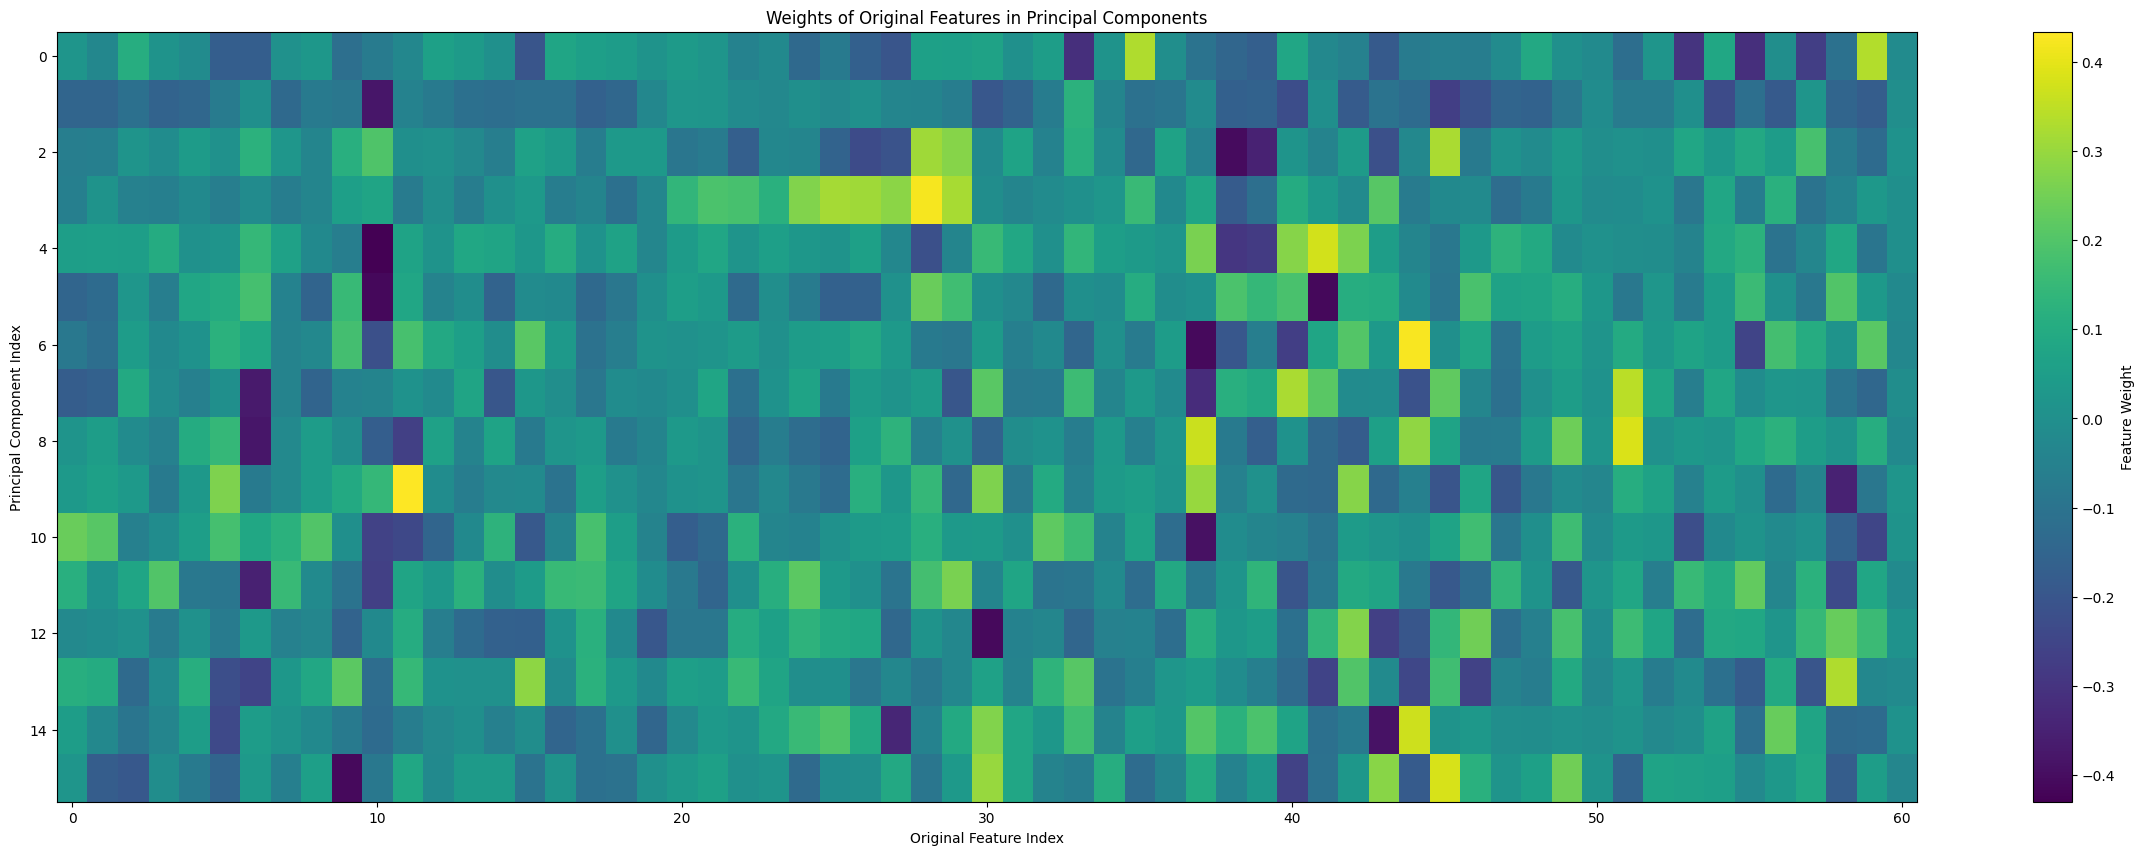

In [47]:
weights = pca.components_

plt.figure(figsize=(30, 10))
plt.imshow(weights , cmap='viridis', aspect='auto')
plt.colorbar(label='Feature Weight')
plt.xlabel('Original Feature Index')
plt.ylabel('Principal Component Index')
plt.title('Weights of Original Features in Principal Components')
plt.show()

In [48]:
AI_.columns[np.unique(np.where((weights[:]>0.3) | (weights[:]< -0.3))[1])]

MultiIndex([(                    'Hệ thống thông tin', 3),
            (                    'Kiến trúc máy tính', 3),
            (                          'Kỹ năng sống', 3),
            (                           'Kỹ thuật số', 2),
            (              'Tiếng Anh sơ trung cấp 3', 2),
            (                 'Tiếng Anh trung cấp 1', 2),
            (                 'Tiếng Anh trung cấp 2', 2),
            (                          'Tiếng Pháp 1', 2),
            (                          'Tiếng Pháp 2', 2),
            (                  'Tiếng Việt thực hành', 2),
            ('Trí tuệ nhân tạo và công nghệ tri thức', 3),
            (                     'Xác suất thống kê', 4),
            (                   'Ứng dụng PowerPoint', 3),
            (                          'Tiếng Nhật 1', 2),
            (                          'Tiếng Nhật 2', 2),
            (             'Nhập môn khoa học dữ liệu', 2),
            (                         'Tiếng Trung 1', 2

In [49]:
# Chia dữ liệu thành các tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng PCA cho dữ liệu huấn luyện
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)

# Chiếu dữ liệu kiểm tra vào không gian mới đã được giảm chiều
X_test_pca = pca.transform(X_test)

# Huấn luyện mô hình Linear Regression trên dữ liệu huấn luyện đã giảm chiều
regressor = RandomForestRegressor()
regressor.fit(X_train_pca, y_train)

# Đánh giá mô hình trên dữ liệu kiểm tra
y_pred = regressor.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.27809607224406085


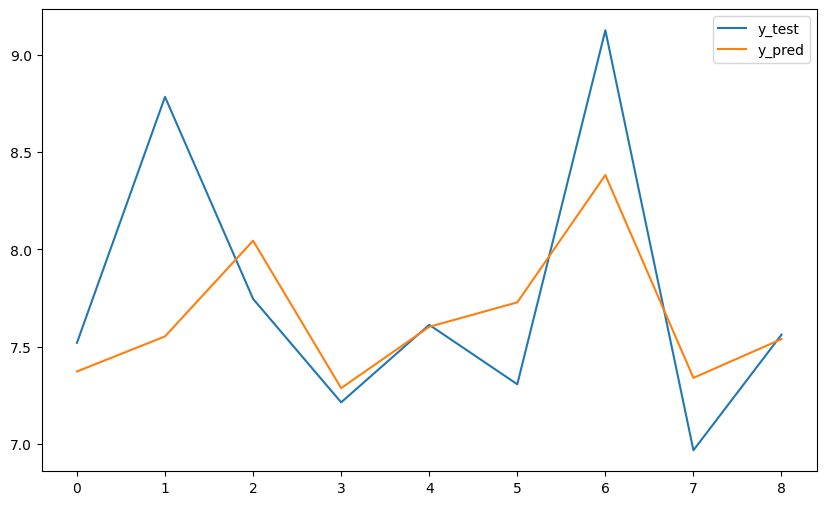

In [54]:
plt.figure(figsize=(10, 6))

plt.plot(np.array(y_test), label='y_test')
plt.plot(regressor.predict(X_test_pca), label='y_pred')
plt.legend()

plt.show()

In [62]:
# Tạo pipeline cho Ridge Regression với PCA
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),
    ('ridge', Ridge())
])

# Thiết lập lựa chọn siêu tham số cho Ridge Regression
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100]  # Các giá trị alpha để thử nghiệm
}

# Tạo GridSearchCV với Ridge Regression và siêu tham số đã chọn
ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Huấn luyện mô hình trên dữ liệu huấn luyện
ridge_grid.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred_ridge = ridge_grid.predict(X_test)

# Tính độ đo MSE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Mean Squared Error (MSE) của Ridge Regression:", mse_ridge)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mean Squared Error (MSE) của Ridge Regression: 0.18624552919844825


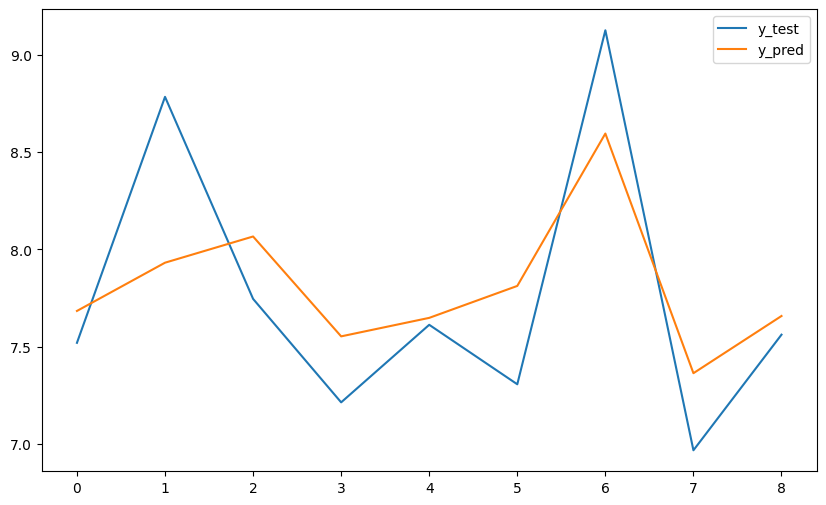

In [63]:
# Vẽ đồ thị dự đoán
plt.figure(figsize=(10, 6))
plt.plot(np.array(y_test), label='y_test')
plt.plot(ridge_grid.predict(X_test), label='y_pred')
plt.legend()
plt.show()

In [64]:
from sklearn.ensemble import RandomForestRegressor

# Tạo pipeline cho RandomForest Regression với PCA
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),
    ('rf', RandomForestRegressor())
])

# Thiết lập lựa chọn siêu tham số cho RandomForest Regression
param_grid = {
    'rf__n_estimators': [100, 200, 300],  # Số lượng cây trong rừng
    'rf__max_depth': [None, 10, 20],  # Độ sâu tối đa của mỗi cây
    'rf__min_samples_split': [2, 5, 10],  # Số lượng mẫu tối thiểu cần phải chia một nút
    'rf__min_samples_leaf': [1, 2, 4]  # Số lượng mẫu tối thiểu cần phải ở mỗi lá
}

# Tạo GridSearchCV với RandomForest Regression và siêu tham số đã chọn
rf_grid = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Huấn luyện mô hình trên dữ liệu huấn luyện
rf_grid.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred_rf = rf_grid.predict(X_test)

# Tính độ đo MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error (MSE) của RandomForest Regression:", mse_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mean Squared Error (MSE) của RandomForest Regression: 0.20572255845619167


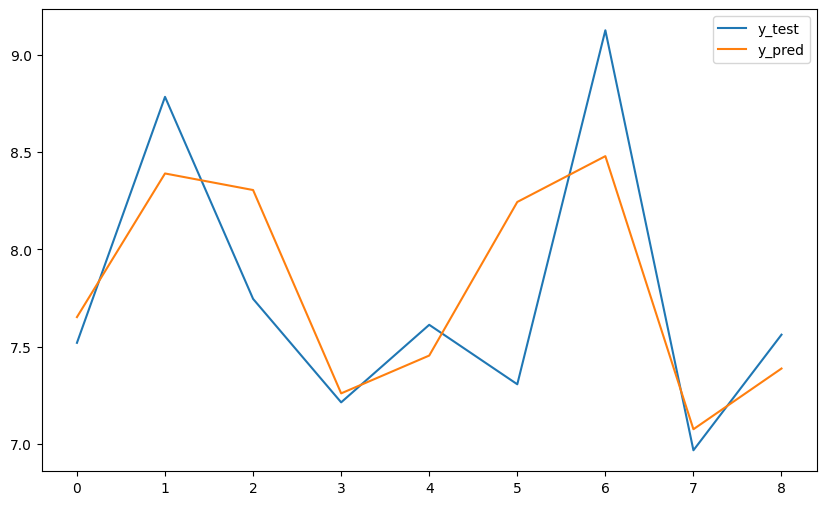

In [65]:
# Vẽ đồ thị dự đoán
plt.figure(figsize=(10, 6))
plt.plot(np.array(y_test), label='y_test')
plt.plot(y_pred_rf, label='y_pred')
plt.legend()
plt.show()

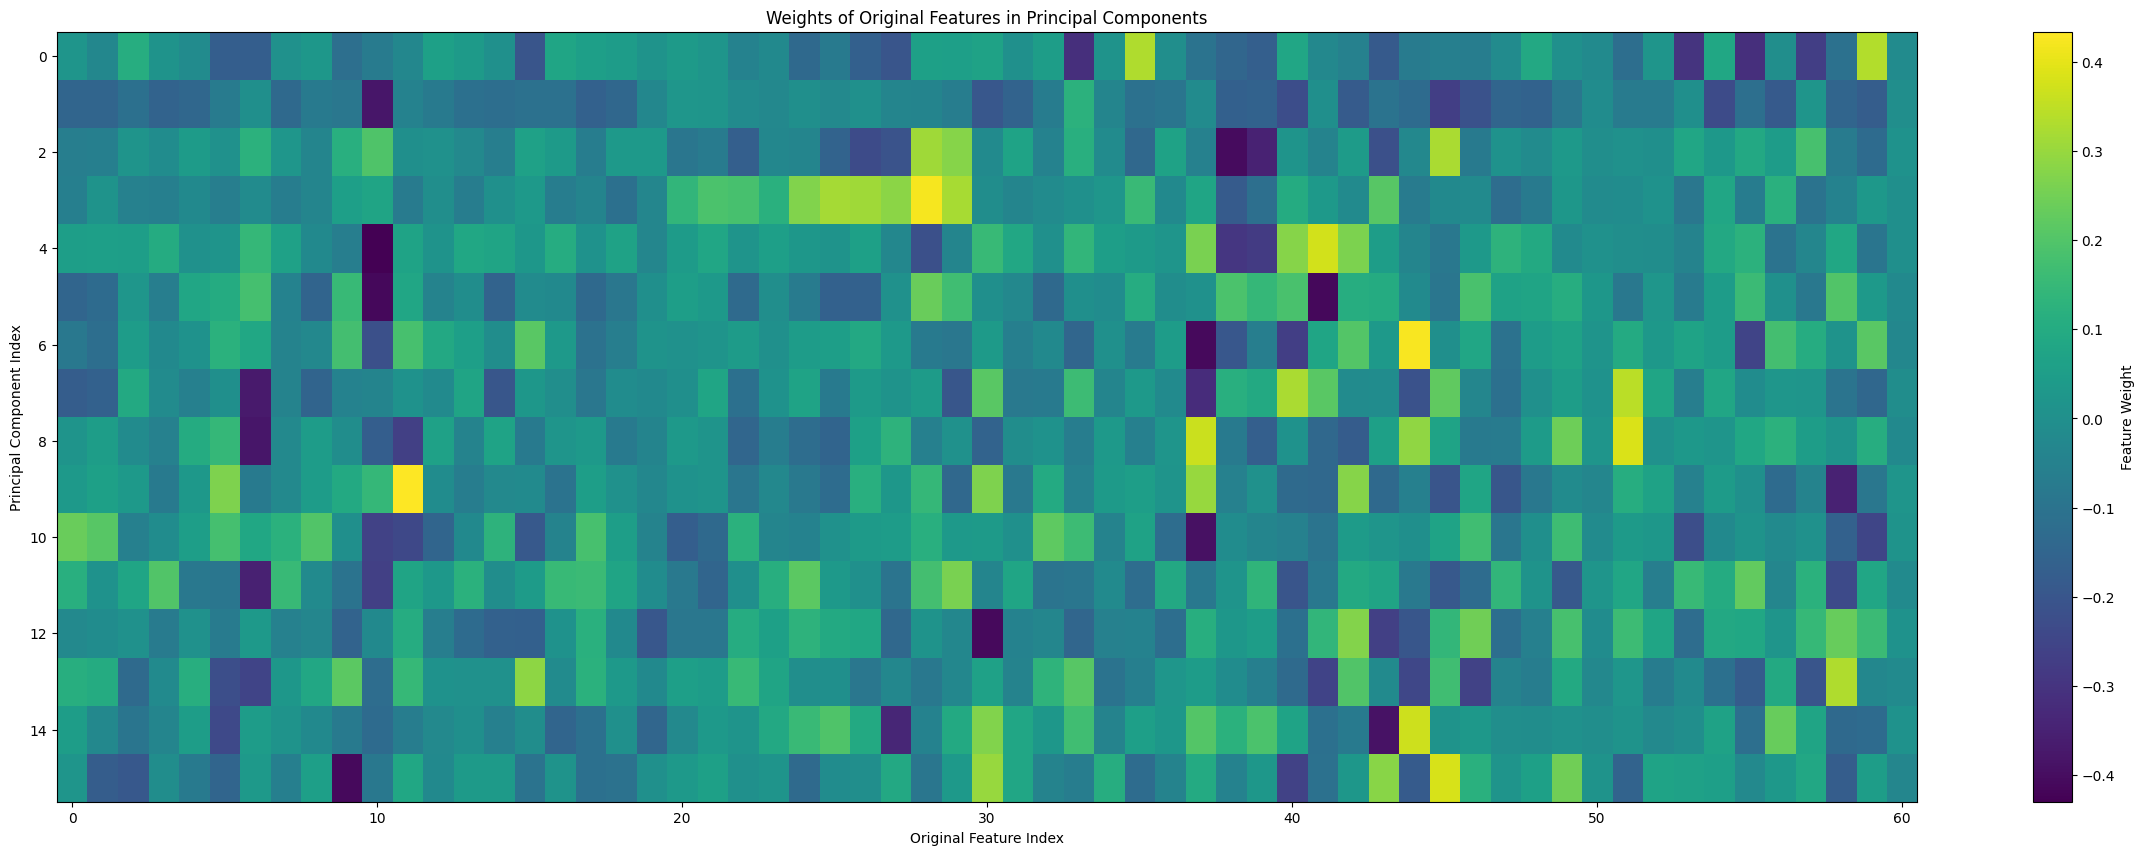

In [67]:
from sklearn.linear_model import LinearRegression

# Tạo và huấn luyện mô hình PCA
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X)

# Xác định mức độ ảnh hưởng của từng đặc trưng đối với các thành phần chính
weights = pca.components_

plt.figure(figsize=(30, 10))
plt.imshow(weights , cmap='viridis', aspect='auto')
plt.colorbar(label='Feature Weight')
plt.xlabel('Original Feature Index')
plt.ylabel('Principal Component Index')
plt.title('Weights of Original Features in Principal Components')
plt.show()

In [68]:
# Tạo và huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [69]:
# Xem đặc trưng quan trọng
important_features = X.columns[np.argsort(np.abs(model.coef_))[::-1]][:pca.n_components_]
print("Các đặc trưng quan trọng:")
print(important_features)

Các đặc trưng quan trọng:
MultiIndex([(                    'Tiếng Anh sơ cấp 2', 2),
            (                     'Xác suất thống kê', 4),
            (                              'Thống Kê', 2),
            (                          'Toán rời rạc', 3),
            (                     'Thống kê nâng cao', 3),
            (                   'Khoa học môi trường', 2),
            ('Các công cụ lập trình trí tuệ nhân tạo', 3),
            (                         'Cơ sở dữ liệu', 3),
            (                  'Nhập môn kinh tế học', 2),
            (              'Tiếng Anh sơ trung cấp 1', 2),
            (                 'Tiếng Anh trung cấp 1', 2),
            (         'Kinh tế chính trị Mác - Lênin', 2),
            (                          'Lịch sử Đảng', 2),
            (                              'Xác suất', 3),
            (                          'Tiếng Pháp 2', 2),
            (             'Chủ nghĩa xã hội khoa học', 2)],
           names=['Tên HP', '

In [70]:
# Huấn luyện lại mô hình Linear Regression chỉ với các đặc trưng quan trọng
X_important = X[important_features]
model.fit(X_important, y)

LinearRegression()

In [71]:
# Dự đoán và tính MSE
y_pred = model.predict(X_important)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.030420866642564506


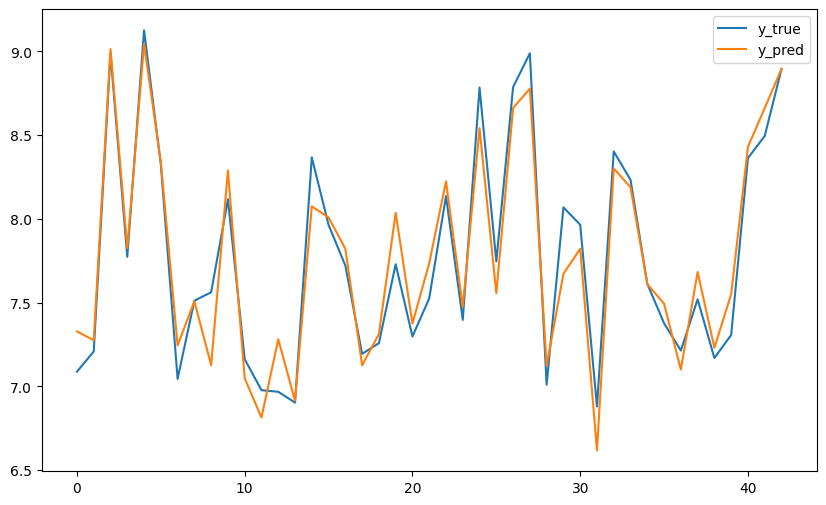

In [72]:
# Vẽ đồ thị dự đoán
plt.figure(figsize=(10, 6))
plt.plot(np.array(y), label='y_true')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

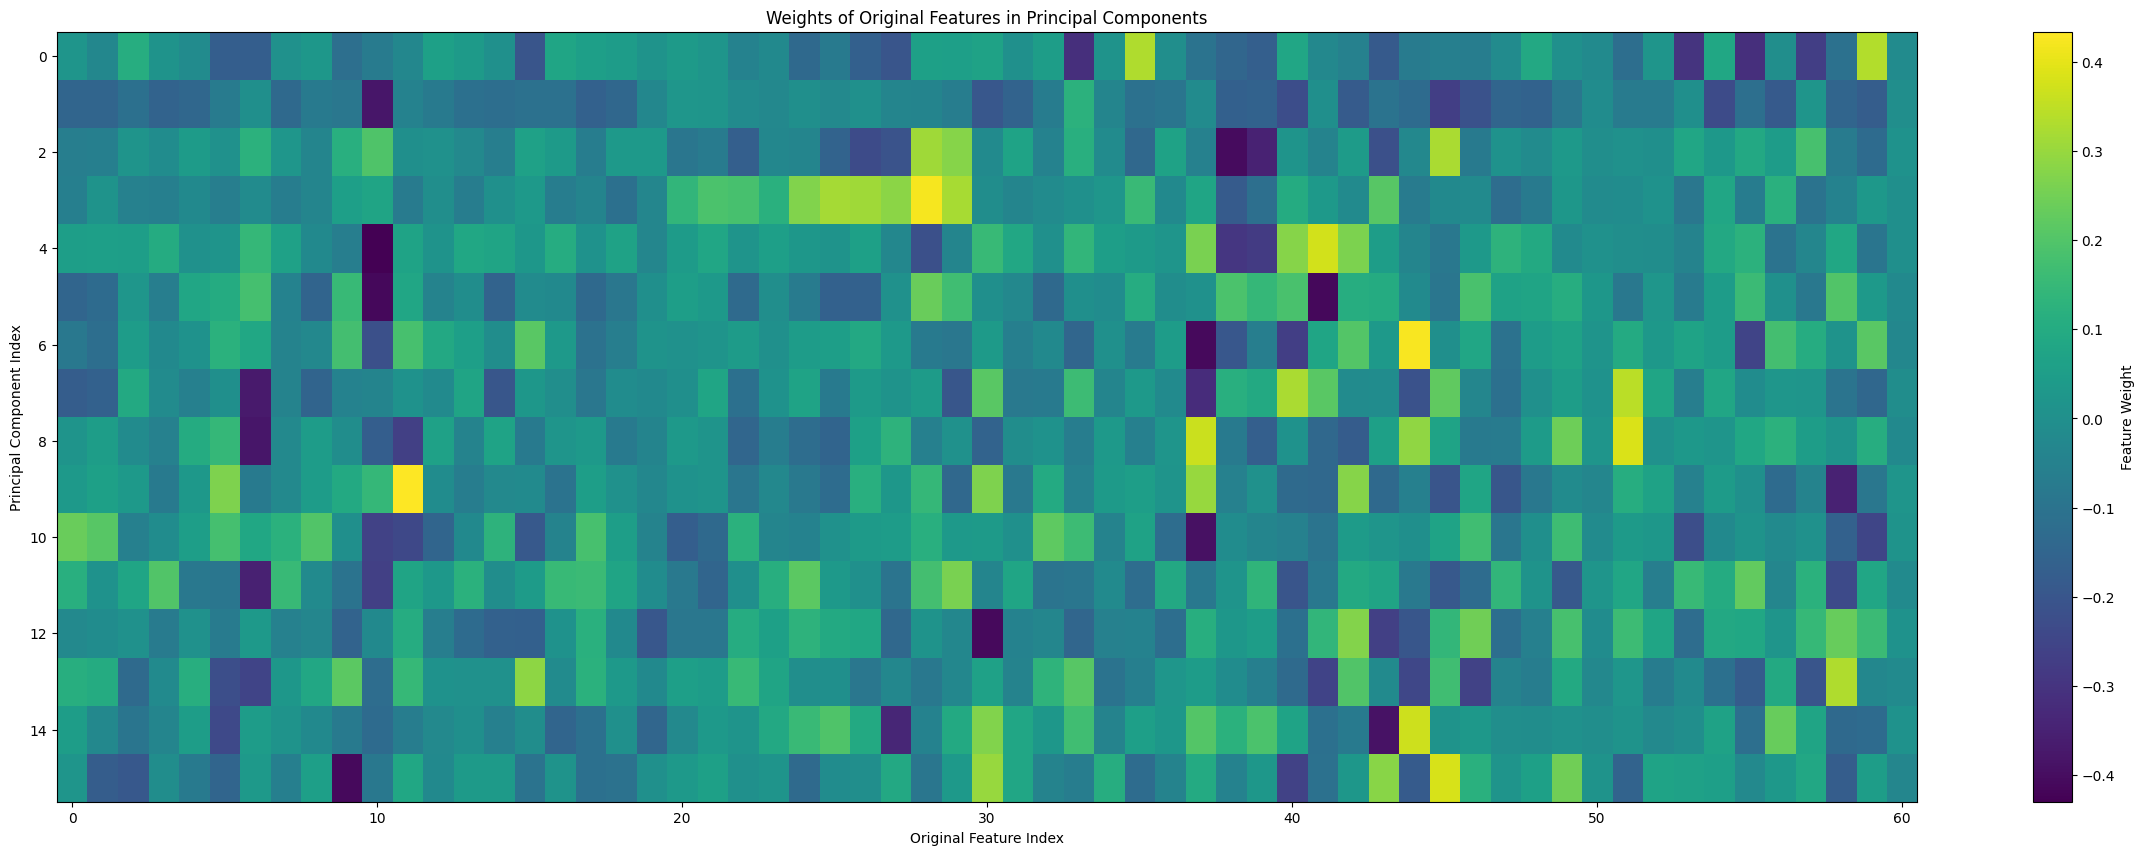

In [73]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Tạo và huấn luyện mô hình PCA
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X)

# Xác định mức độ ảnh hưởng của từng đặc trưng đối với các thành phần chính
weights = pca.components_

plt.figure(figsize=(30, 10))
plt.imshow(weights , cmap='viridis', aspect='auto')
plt.colorbar(label='Feature Weight')
plt.xlabel('Original Feature Index')
plt.ylabel('Principal Component Index')
plt.title('Weights of Original Features in Principal Components')
plt.show()

In [74]:
# Tạo pipeline cho Ridge Regression với PCA
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),
    ('ridge', Ridge())
])

In [75]:
# Thiết lập lựa chọn siêu tham số cho Ridge Regression
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100]  # Các giá trị alpha để thử nghiệm
}

# Tìm siêu tham số tốt nhất cho mô hình
ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X, y)

print("Best Parameters:", ridge_grid.best_params_)

Best Parameters: {'ridge__alpha': 100}


In [76]:
# Xem đặc trưng quan trọng
best_alpha = ridge_grid.best_params_['ridge__alpha']
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X, y)
important_features = X.columns[np.argsort(np.abs(ridge_model.coef_))[::-1]][:pca.n_components_]
print("Các đặc trưng quan trọng:")
print(important_features)

Các đặc trưng quan trọng:
MultiIndex([(                           'Cơ sở dữ liệu', 3),
            (                       'Thống kê nâng cao', 3),
            (                       'Đại số tuyến tính', 3),
            (                      'Tiếng Anh sơ cấp 1', 2),
            (                      'Tiếng Anh sơ cấp 2', 2),
            ('Logic, suy luận toán học và kỹ thuật đếm', 3),
            (                       'Xác suất thống kê', 4),
            (                             'Giải tích 1', 3),
            (                     'Khoa học môi trường', 2),
            (                                 'Học máy', 3),
            (               'Nhập môn trí tuệ nhân tạo', 3),
            (                      'Hệ thống thông tin', 3),
            (                        'Cấu trúc dữ liệu', 3),
            (               'Nhập môn khoa học dữ liệu', 2),
            (                    'Tư tưởng Hồ Chí Minh', 2),
            (                            'Lịch sử Đảng', 2)

In [77]:
# Huấn luyện lại mô hình Ridge Regression chỉ với các đặc trưng quan trọng
X_important = X[important_features]
ridge_model.fit(X_important, y)

Ridge(alpha=100)

In [78]:
# Dự đoán và tính MSE
y_pred = ridge_model.predict(X_important)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.048473764232880814


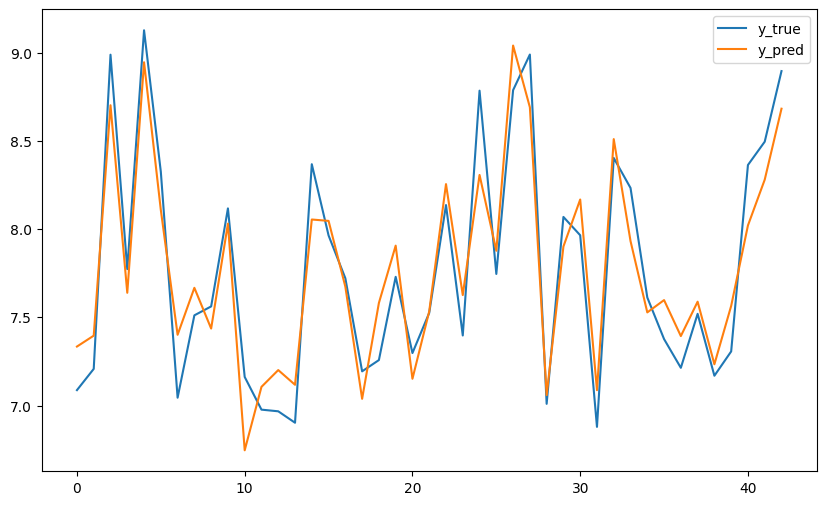

In [79]:
# Vẽ đồ thị dự đoán
plt.figure(figsize=(10, 6))
plt.plot(np.array(y), label='y_true')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

In [89]:
# # Tạo pipeline cho RandomForest Regression với PCA
# rf_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=0.90)),
#     ('rf', RandomForestRegressor())
# ])

In [90]:
# Thiết lập lựa chọn siêu tham số cho RandomForest Regression
param_grid = {
    'rf__n_estimators': [100, 200, 300],  # Số lượng cây trong rừng
    'rf__max_depth': [None, 10, 20],  # Độ sâu tối đa của mỗi cây
    'rf__min_samples_split': [2, 5, 10],  # Số lượng mẫu tối thiểu cần phải chia một nút
    'rf__min_samples_leaf': [1, 2, 4]  # Số lượng mẫu tối thiểu cần phải ở mỗi lá
}

In [91]:
# Tìm siêu tham số tốt nhất cho mô hình
rf_grid = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X, y)

print("Best Parameters:", rf_grid.best_params_)

Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}


In [92]:
# Xem đặc trưng quan trọng
best_rf = rf_grid.best_estimator_.named_steps['rf']
importance_rf = best_rf.feature_importances_
important_features = X.columns[np.argsort(importance_rf)[::-1]][:pca.n_components_]
print("Các đặc trưng quan trọng:")
print(important_features)

Các đặc trưng quan trọng:
MultiIndex([(    'Chủ nghĩa xã hội khoa học', 2),
            (                  'Công dân số', 2),
            (             'Cấu trúc dữ liệu', 3),
            (                  'Giải tích 1', 3),
            (           'Kiến trúc máy tính', 3),
            (                'Cơ sở dữ liệu', 3),
            (          'Khoa học môi trường', 2),
            (           'Ngôn ngữ lập trình', 3),
            (         'Nhập môn kinh tế học', 2),
            (                'Mạng máy tính', 2),
            (                  'Kỹ thuật số', 2),
            (           'Hệ thống thông tin', 3),
            (                 'Lịch sử Đảng', 2),
            (                 'Kỹ năng sống', 3),
            (          'Pháp luật đại cương', 2),
            ('Kinh tế chính trị Mác - Lênin', 2)],
           names=['Tên HP', 'Số TC'])


In [93]:
# Huấn luyện lại mô hình RandomForest Regression chỉ với các đặc trưng quan trọng
X_important = X[important_features]
rf_grid.fit(X_important, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [94]:
# Dự đoán và tính MSE
y_pred = rf_grid.predict(X_important)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0201599544893395


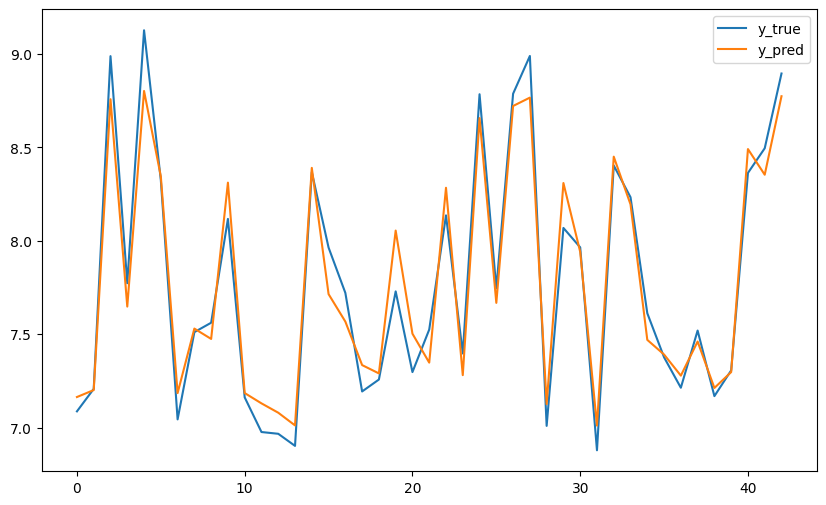

In [95]:
# Vẽ đồ thị dự đoán
plt.figure(figsize=(10, 6))
plt.plot(np.array(y), label='y_true')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()